# **Boosting & Stacking Assignment**


1. **What is Boosting in Machine Learning? Explain how it improves weak
learners**.
- Boosting is an ensemble machine learning technique that builds a strong predictive model by combining multiple "weak learners" in a sequential process.
- A weak learner is any model that performs only slightly better than random guessing, such as a shallow decision tree (often called a decision stump). Unlike other ensemble methods like bagging, which train models independently, boosting trains each new model to correct the errors of its predecessor.
- The final strong model is a weighted combination of all the weak learners. This iterative approach focuses on minimizing errors, primarily reducing bias and to a lesser extent, variance, which results in a highly accurate and robust model.

  **How boosting improves weak learners**

- Boosting improves weak learners by iteratively training new models that learn from the errors of their predecessors. This approach effectively reduces the model's bias and leads to a more robust and accurate final model.
- Here is a step-by-step breakdown of the general process, using AdaBoost as an example:
  - Initial model: A weak learner is trained on the dataset, with each data point having an equal weight.
  - Identify and weigh errors: The model makes an initial prediction, and the algorithm identifies which data points were misclassified. It then increases the weight of these misclassified data points, giving them more importance.
  - Train the next learner: A second weak learner is trained on the dataset, but this time it pays more attention to the higher-weighted, misclassified data points.
  - Repeat and aggregate: This process repeats for a set number of iterations. Each subsequent model is trained to correct the errors of the combined ensemble that came before it.
  - Final model: The final, "strong" model combines the results of all the weak learners. Learners that performed better are given more weight in the final prediction, resulting in a model that can make more accurate and complex predictions than any single learner could.



2. **What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?**
- AdaBoost and Gradient Boosting both train models sequentially to correct the mistakes of previous models, but they differ fundamentally in how they identify and address those errors.
- AdaBoost modifies the weight of each data point to focus on misclassified samples, while Gradient Boosting trains new models to specifically predict the residual errors of the prior models.

  **How AdaBoost trains its models**

  The AdaBoost (Adaptive Boosting) algorithm uses a system of weighted votes to train its weak learners, which are typically shallow decision trees or "stumps".
  - Initial weights: All training examples are initially given an equal weight.
  - Sequential training: A weak learner is trained on the dataset using the current sample weights. After training, the algorithm evaluates the learner's performance.
  - Update weights:
    - The weights of correctly classified instances are decreased.
    - The weights of misclassified instances are increased, so the next weak learner will focus more on these "difficult" cases.
  - Repeat and combine: This process repeats for a set number of iterations. The final model is a weighted sum of all the weak learners, where the vote of each learner is weighted by its accuracy.

  **How Gradient Boosting trains its models**

  Gradient Boosting takes a more mathematical approach, using a differentiable loss function to find the errors that need to be corrected.
  - Initial prediction: The process starts with a simple initial prediction, such as the average of the target values.
  - Calculate residuals: The algorithm calculates the residuals, which are the differences between the actual and predicted values. For classification, it uses a variation called "pseudo-residuals".
  - Train on residuals: A new weak learner, usually a deeper decision tree than an AdaBoost stump, is trained to predict the residuals from the previous step.
  - Sequential addition: The new model is added to the ensemble, but its contribution is scaled down by a learning rate to prevent overfitting.
  - Repeat and refine: The new ensemble prediction is the initial prediction plus the (scaled) output of the new model. The residuals are recalculated, and a new model is trained to fix the remaining errors. This continues until the overall error is minimized.

3. **How does regularization help in XGBoost?**
- Regularization helps XGBoost by controlling model complexity and preventing overfitting, which is when a model learns the training data too well and performs poorly on unseen data. This leads to a more robust and generalized model that can make accurate predictions on new data.

  **How regularization works in XGBoost**

  XGBoost's objective function is a combination of two parts: the training loss and a regularization term. The regularization term penalizes the complexity of the model, specifically the decision trees being built, to keep it from becoming too intricate.

  The primary ways regularization is implemented include:
-  L1 and L2 regularization (**α**) and (**λ**): These are parameters that penalize the "leaf weights" (the final prediction scores in each leaf of the tree).
    - L1 regularization (**α**): Adds a penalty equal to the absolute value of the leaf weights, which can force some of them to become exactly zero. This promotes sparsity, making the model simpler by effectively removing less important features.
    - L2 regularization (**λ**): Adds a penalty equal to the square of the leaf weights, which encourages the weights to be small but not necessarily zero. It stabilizes the model by preventing any single feature from having too much influence.
- Gamma (**γ**): This parameter specifies the minimum loss reduction required to make a further split on a leaf node. A higher **γ** value makes the algorithm more conservative by creating fewer, more significant splits, which results in shallower trees and less risk of overfitting.
- `max_depth`: This hyperparameter directly limits how deep each decision tree can grow. A shallower tree is less complex and less likely to overfit.
- `min_child_weight`: This sets a minimum threshold on the sum of instance weights (or "cover") needed in a child node for a split to occur. Increasing this value makes the algorithm more conservative by preventing it from creating partitions on nodes with few data points, which are more susceptible to noise.
- Subsampling (`subsample` and `colsample`): These techniques introduce randomness by training each new tree on only a fraction of the data or a subset of the features. This prevents the model from becoming dependent on specific data points or features, improving its robustness.
- Early stopping (`early_stopping_rounds`): This technique stops the training process if a model's performance on a validation set doesn't improve for a specified number of rounds. This prevents the model from training for too long and overfitting.
- Shrinkage (`eta` or `learning_rate`): The learning rate controls how much each new tree's contribution shrinks towards the final prediction. A smaller learning rate forces the model to take smaller steps, requiring more trees but improving its robustness and generalization.     

4. **Why is CatBoost considered efficient for handling categorical data?**
- CatBoost is efficient at handling categorical data primarily because of its ordered target encoding and ordered boosting mechanisms, which prevent the data leakage and overfitting that can plague other gradient boosting models. This approach bypasses the need for manual, time-consuming preprocessing steps like one-hot encoding.

  **How CatBoost's categorical handling works**

- Ordered Target Encoding

  Standard target encoding, which replaces categories with the mean of the target variable, is susceptible to a form of data leakage called "target leakage". If the model uses the target variable to encode the same data it is trained on, it can learn patterns from the target variable that would not be available for real-world predictions.

  CatBoost avoids this by using a permutation-driven approach to compute target statistics:
  - It creates a random permutation of the training data.
  - For each example in the dataset, it calculates the target statistic based only on the rows that appeared before it in the random permutation.
  - This ensures the model cannot use information from future data points to encode the current one, protecting against data leakage and overfitting.
- Ordered Boosting

  Classic gradient boosting algorithms can suffer from a "prediction shift" because the gradients for a new tree are calculated using the same data the current model was trained on. CatBoost addresses this with an ordered boosting mechanism.
  - In each iteration, CatBoost builds a new base model on a different, randomly permuted subset of the data.
  - The residuals (errors) for a data point are calculated using a model trained only on data points that came before it in the permutation.
  - This reduces bias in gradient estimation, which in turn leads to more robust and accurate models.  



5. **What are some real-world applications where boosting techniques are
preferred over bagging methods?**
- Boosting techniques are often preferred over bagging in applications where achieving high predictive accuracy on complex, imbalanced, or intricate datasets is the top priority. Unlike bagging (which focuses on reducing variance), boosting sequentially builds models that correct the errors of previous ones, effectively reducing bias and uncovering subtle data patterns.

  **Real-world applications for boosting over bagging**

- Medical diagnosis

  Boosting is used for tasks like predicting disease risk or classifying diseases from patient data.
  - Boosting's strength: When a disease is rare, boosting can learn from the errors of a weak classifier to improve its ability to identify the complex patterns associated with the minority class.
  - Bagging's weakness: In a highly imbalanced dataset, a bagging model may overlook the patterns associated with the rare disease, as its focus is averaged across all cases, potentially leading to misdiagnosis.
- Marketing and customer analytics
  
  Boosting is ideal for precise marketing efforts, such as predicting customer churn or customer lifetime value.
  - Boosting's strength: These models excel at finding the subtle behaviors and features that indicate a customer is at high risk of leaving, allowing for targeted intervention strategies.
  - Bagging's weakness: Since it averages the results of multiple independent models, a bagging model may not have the same precision for predicting rare, complex events like churn, especially if the signal is subtle.  
- Fraud detection

  In finance and e-commerce, fraud detection is a classic example of an imbalanced dataset, where fraudulent transactions are extremely rare compared to legitimate ones.
  - Boosting's strength: By sequentially re-weighting misclassified transactions, boosting algorithms like XGBoost and LightGBM force the model to focus on the hard-to-classify, rare fraudulent cases.
  - Bagging's weakness: A bagging method like Random Forest might average out the importance of these rare events because most of its base models are trained on resampled data dominated by legitimate transactions.   
- Ranking systems

  Search engines and recommender systems require a specific order of items rather than simple classification.
  - Boosting's strength: Modern boosting libraries like LightGBM and XGBoost offer specialized ranking objective functions that can directly optimize for the correct order of items. By iteratively refining the model, they can learn the complex, non-linear relationships that determine relative relevance.
  - Bagging's weakness: Standard bagging methods are not designed to optimize for ranked outcomes and are less effective at capturing the subtle, complex feature interactions required for accurate item ordering.   

6. **Write a Python program to:**
  - **Train an AdaBoost Classifier on the Breast Cancer dataset**
  - **Print the model accuracy**

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost classifier
model = AdaBoostClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


AdaBoost Classifier Accuracy: 0.9649


7. **Write a Python program to:**
  - **Train a Gradient Boosting Regressor on the California Housing dataset**
  - **Evaluate performance using R-squared score**

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R-squared Score: {r2:.4f}")


Gradient Boosting Regressor R-squared Score: 0.7756


8. **Write a Python program to:**
  - **Train an XGBoost Classifier on the Breast Cancer dataset**
  - **Tune the learning rate using GridSearchCV**
  - **Print the best parameters and accuracy**

In [3]:
pip install xgboost


In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up the parameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Use GridSearchCV to tune the learning rate
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy of Best Model: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2}
Accuracy of Best Model: 0.9561


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:37:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


9. **Write a Python program to:**
 -  **Train a CatBoost Classifier**
 -  **Plot the confusion matrix using `seaborn`**

In [6]:
pip install catboost seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


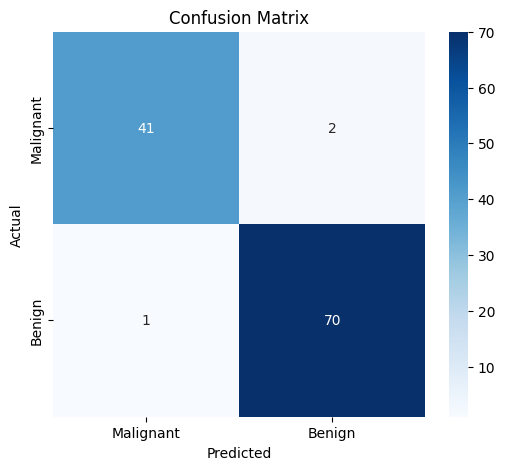

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost Classifier
model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, silent=True)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


10. **You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:**
- **Data preprocessing & handling missing/categorical values**
- **Choice between AdaBoost, XGBoost, or CatBoost**
- **Hyperparameter tuning strategy**
- **Evaluation metrics you'd choose and why**
- **How the business would benefit from your model**


- To develop a robust loan default prediction model for a FinTech company, the data science pipeline would systematically address challenges like imbalanced data, missing values, and mixed feature types. A boosting ensemble model, such as CatBoost, XGBoost, or AdaBoost, can then be trained and fine-tuned to maximize predictive power.

  **Step-by-step data science pipeline**
  
  **Data preprocessing & handling missing/categorical values**
- Exploratory Data Analysis (EDA): Understand the dataset by examining summary statistics, distributions, and the relationship between features. Key checks include identifying the proportion of defaults, understanding the nature of features (numeric, categorical), and visualizing the data distribution.
- Addressing class imbalance: The dataset contains significantly more non-defaulting customers than defaulting ones. To prevent the model from becoming biased towards the majority class, one of the following resampling techniques should be applied to the training data:
  - SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic data points for the minority (default) class to balance the class distribution.
  - Class weighting: The model's loss function can be adjusted to give a higher penalty for misclassifying the minority class, which is a method offered by most boosting algorithms.
  - NearMiss Undersampling: Randomly removes samples from the majority class to balance the dataset.
- Handling missing values: Missing data must be handled appropriately to prevent model errors.
  - For numerical features: Use imputation techniques like replacing missing values with the mean, median, or mode. For a more sophisticated approach, use K-Nearest Neighbors (KNN) imputation, which estimates missing values based on similar data points.
  - For categorical features: Fill missing values with the mode. An alternative is to create a new category for "missing" if the missingness is non-random and holds predictive power.
- Encoding categorical features: Most boosting algorithms require numerical inputs.
  - Target-agnostic: Use techniques like one-hot encoding for nominal features, or label encoding for ordinal features. This approach is often used with AdaBoost and XGBoost.
  - Native handling: Use CatBoost's built-in capability to handle categorical features directly, which can improve model performance and reduce preprocessing efforts.  

  **Choice between AdaBoost, XGBoost, or CatBoost**

  The choice of boosting algorithm depends on the dataset's characteristics and the specific requirements of the project.
- AdaBoost:
  - Best for: Small, clean datasets and fast training.
  - Considerations: Less powerful than gradient boosting methods for complex problems. Does not natively handle missing values or categorical features, requiring careful preprocessing.
- XGBoost:
  - Best for: Large datasets, as it is highly scalable, and situations requiring regularization to prevent overfitting.
  - Considerations: Faster than traditional Gradient Boosting. Does not natively handle categorical features, so they must be pre-encoded. Offers high performance and robust feature handling.
- CatBoost:
  - Best for: Datasets with many categorical features, as it handles them natively, and datasets with outliers, as it is more robust to them.
  - Considerations: Often produces high accuracy out-of-the-box but can be slower to train than XGBoost or LightGBM. Its ordered boosting approach helps prevent overfitting on categorical data.  

  **Hyperparameter tuning strategy**

  To find the optimal hyperparameters for the chosen boosting model, the following strategy should be employed:
- Define the search space: Specify a range of values for critical hyperparameters, such as learning rate, number of estimators, and tree depth.
- Use cross-validation: Split the training data into k-folds to ensure robust evaluation and prevent data leakage. Stratified K-fold cross-validation is essential here to maintain the class distribution in each fold.
- Choose a search method:
  - Randomized Search with Cross-Validation (RandomizedSearchCV): Search a specified number of parameter combinations randomly. This is more computationally efficient than grid search and often finds a good solution faster.
  - Bayesian Optimization: Use past results to intelligently select the next set of hyperparameters to try. This is more efficient for large search spaces and can find optimal solutions in fewer iterations.
- Consider cost-sensitive tuning: Given the business impact of false negatives (approving a defaulting loan) versus false positives (denying a non-defaulting loan), the tuning process can incorporate cost-sensitive metrics.

  **Evaluation metrics you'd choose and why**

  In an imbalanced dataset, accuracy is misleading because a model can achieve high accuracy by simply predicting the majority class. The following metrics provide a more nuanced and business-relevant evaluation:
- Confusion Matrix: A detailed breakdown of True Positives, True Negatives, False Positives, and False Negatives, which helps interpret the model's error types.
- Precision and Recall:
  - Precision: The ratio of true positives to the total predicted positives. It measures the model's accuracy in predicting defaults. For a FinTech, this is important for managing risk and ensuring that predicted defaults are accurate.
  - Recall (Sensitivity): The ratio of true positives to the total actual positives. It measures the model's ability to find all defaulters. Maximizing recall is often critical in loan default prediction to catch as many at-risk borrowers as possible.
- F1-Score: The harmonic mean of precision and recall. It offers a balanced measure of a model's performance on the minority class.
- AUC-ROC (Area Under the Receiver Operating Characteristic Curve): Measures the model's ability to discriminate between positive (default) and negative (non-default) classes across various probability thresholds. A high AUC-ROC indicates strong discriminatory power.
- AUC-PR (Area Under the Precision-Recall Curve): Particularly useful for highly imbalanced datasets, as it focuses on the performance of the minority class. A higher AUC-PR indicates better performance on the positive (default) class.

  **How the business would benefit from your model**

  This predictive model offers several tangible benefits for the FinTech company:
- Improved risk management: By accurately predicting the probability of default, the company can make more informed lending decisions. It can set appropriate interest rates and terms based on risk scores, or deny high-risk applications, thereby reducing financial losses from defaults.
- Enhanced profitability: With better risk assessment, the company can expand its lending pool to creditworthy individuals who might have been previously rejected by traditional scoring methods, increasing its customer base and profitability.
- Early intervention: The model can provide early warning signals for existing loans that show high-risk behavior. This allows the company to proactively engage with these customers and implement strategies like loan restructuring or refinancing to prevent a default from occurring.
- Operational efficiency: The automated and data-driven approach to risk assessment can speed up the loan application process, reducing manual underwriting efforts and operational costs.
- Fairness and interpretability: Using modern boosting models like CatBoost and employing Explainable AI techniques like SHAP allows for insights into which features contribute most to the prediction. This helps ensure the model is not relying on biased or unfair features, which is critical for regulatory compliance and building customer trust.

